Entrenamiento completado en 34 épocas
Error final: 0

Pesos finales: [0.0450537  0.01613612]
Umbral final: 0.04677705565959503


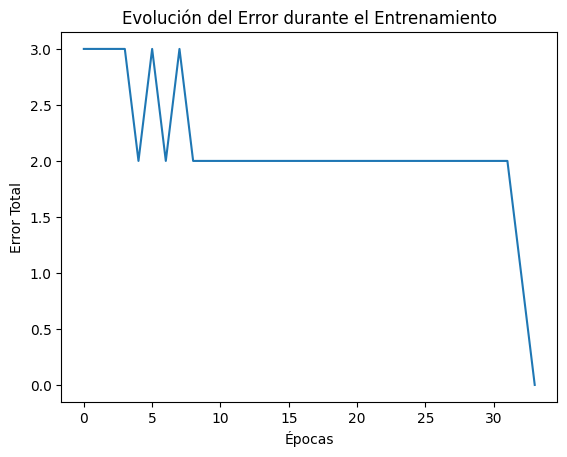


Pruebas:
Entrada: [0 0], Salida: 0
Entrada: [0 1], Salida: 0
Entrada: [1 0], Salida: 0
Entrada: [1 1], Salida: 1


In [21]:
import numpy as np
import matplotlib.pyplot as plt

class Perceptron:
    def __init__(self, n_inputs, learning_rate=0.03):
        """Inicializar el perceptrón
            n_inputs: número de entradas
            learning_rate: tasa de aprendizaje (theta)"""
        self.weights = np.random.uniform(-1, 1, n_inputs)
        self.threshold = np.random.uniform(-1, 1)
        self.learning_rate = learning_rate

    def activation_function(self, x):
        """Función de activación escalón"""
        return 1 if x >= 0 else 0

    def predict(self, X):
        """Paso 3: Propagar - calcular Y en función de X
            X: array de características de entrada"""
        weighted_sum = np.dot(X, self.weights) - self.threshold
        return self.activation_function(weighted_sum)

    def train(self, X, D, max_epochs=1000, error_threshold=0.0):
        """Entrenar el perceptrón
            X: matriz de características de entrada
            D: array de salidas deseadas
            max_epochs: número máximo de épocas
            error_threshold: umbral de error aceptable"""
        n_samples = len(X)
        epoch = 0
        total_error = float('inf')
        error_history = []  # Lista para almacenar el error en cada época

        while epoch < max_epochs and total_error > error_threshold:
            total_error = 0

            for i in range(n_samples):
                y = self.predict(X[i])
                error = D[i] - y
                total_error += abs(error)

                if error != 0:
                    self.weights += self.learning_rate * error * X[i]
                    self.threshold -= self.learning_rate * error

            error_history.append(total_error)  # Guardar el error de la época actual
            epoch += 1

        return epoch, total_error, error_history

# Ejemplo de uso
if __name__ == "__main__":

    X = np.array([[0,0], [0,1], [1,0], [1,1]])
    D = np.array([0, 0, 0, 1])

    perceptron = Perceptron(n_inputs=2)
    epochs, final_error, error_history = perceptron.train(X, D)

    print(f"Entrenamiento completado en {epochs} épocas")
    print(f"Error final: {final_error}")
    print("\nPesos finales:", perceptron.weights)
    print("Umbral final:", perceptron.threshold)

    # Graficar el error por época
    plt.plot(error_history)
    plt.xlabel("Épocas")
    plt.ylabel("Error Total")
    plt.title("Evolución del Error durante el Entrenamiento")
    plt.show()

    # Probar el perceptrón
    print("\nPruebas:")
    for x in X:
        y = perceptron.predict(x)
        print(f"Entrada: {x}, Salida: {y}")
